# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
import pickle
import os

data_dir = "./traffic-signs-data/"
training_file = os.path.join(data_dir, "train.p")
validation_file= os.path.join(data_dir, "valid.p")
testing_file = os.path.join(data_dir, "test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("Loaded data.")

Loaded data.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(X_train)

n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape

classes = sorted(np.unique(y_train))
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Build Class Mapping

In [3]:
import pandas

class_to_description = pandas.DataFrame.from_csv("./traffic-signs-data/signnames.csv").to_dict('index')

/Users/jamesfulford/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


### Exploratory Visualization

Visualize the German Traffic Signs Dataset using the pickled file(s).

 2: 2010 (Speed limit (50km/h))
 1: 1980 (Speed limit (30km/h))
13: 1920 (Yield)
12: 1890 (Priority road)
38: 1860 (Keep right)
10: 1800 (No passing for vehicles over 3.5 metric tons)
 4: 1770 (Speed limit (70km/h))
 5: 1650 (Speed limit (80km/h))
25: 1350 (Road work)
 9: 1320 (No passing)
 7: 1290 (Speed limit (100km/h))
 8: 1260 (Speed limit (120km/h))
 3: 1260 (Speed limit (60km/h))
11: 1170 (Right-of-way at the next intersection)
35: 1080 (Ahead only)
18: 1080 (General caution)
17:  990 (No entry)
31:  690 (Wild animals crossing)
14:  690 (Stop)
33:  599 (Turn right ahead)
26:  540 (Traffic signals)
15:  540 (No vehicles)
28:  480 (Children crossing)
23:  450 (Slippery road)
41:  420 (End of no passing)
30:  390 (Beware of ice/snow)
34:  360 (Turn left ahead)
16:  360 (Vehicles over 3.5 metric tons prohibited)
 6:  360 (End of speed limit (80km/h))
36:  330 (Go straight or right)
22:  330 (Bumpy road)
40:  300 (Roundabout mandatory)
20:  300 (Dangerous curve to the right)
39:  270 

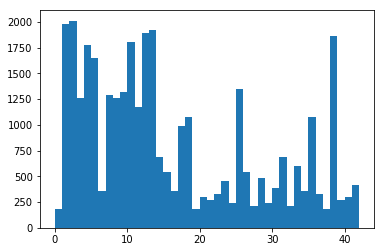

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

frequencies, classes, *_ = plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max() + 1))
for (freq, cls) in reversed(sorted(zip(frequencies, classes))):
    print("{}: {} ({})".format(
        str(cls).rjust(2, " "), 
        str(int(freq)).rjust(4, " "),
        class_to_description[cls]["SignName"],
    ))

plt.savefig("./artifacts/training_data_distribution.png")

13:  240 (Yield)
 2:  240 (Speed limit (50km/h))
 1:  240 (Speed limit (30km/h))
38:  210 (Keep right)
12:  210 (Priority road)
10:  210 (No passing for vehicles over 3.5 metric tons)
 5:  210 (Speed limit (80km/h))
 4:  210 (Speed limit (70km/h))
25:  150 (Road work)
11:  150 (Right-of-way at the next intersection)
 9:  150 (No passing)
 8:  150 (Speed limit (120km/h))
 7:  150 (Speed limit (100km/h))
 3:  150 (Speed limit (60km/h))
35:  120 (Ahead only)
18:  120 (General caution)
17:  120 (No entry)
33:   90 (Turn right ahead)
31:   90 (Wild animals crossing)
15:   90 (No vehicles)
14:   90 (Stop)
41:   60 (End of no passing)
40:   60 (Roundabout mandatory)
36:   60 (Go straight or right)
34:   60 (Turn left ahead)
30:   60 (Beware of ice/snow)
28:   60 (Children crossing)
26:   60 (Traffic signals)
23:   60 (Slippery road)
22:   60 (Bumpy road)
21:   60 (Double curve)
20:   60 (Dangerous curve to the right)
16:   60 (Vehicles over 3.5 metric tons prohibited)
 6:   60 (End of speed l

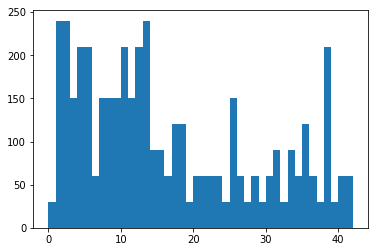

In [5]:
frequencies, classes, *_ = plt.hist(y_valid, bins=np.arange(y_valid.min(), y_valid.max() + 1))
for (freq, cls) in reversed(sorted(zip(frequencies, classes))):
    print("{}: {} ({})".format(
        str(cls).rjust(2, " "), 
        str(int(freq)).rjust(4, " "),
        class_to_description[cls]["SignName"],
    ))

plt.savefig("./artifacts/validation_data_distribution.png")

 2:  750 (Speed limit (50km/h))
13:  720 (Yield)
 1:  720 (Speed limit (30km/h))
38:  690 (Keep right)
12:  690 (Priority road)
10:  660 (No passing for vehicles over 3.5 metric tons)
 4:  660 (Speed limit (70km/h))
 5:  630 (Speed limit (80km/h))
25:  480 (Road work)
 9:  480 (No passing)
 8:  450 (Speed limit (120km/h))
 7:  450 (Speed limit (100km/h))
 3:  450 (Speed limit (60km/h))
11:  420 (Right-of-way at the next intersection)
35:  390 (Ahead only)
18:  390 (General caution)
17:  360 (No entry)
31:  270 (Wild animals crossing)
14:  270 (Stop)
33:  210 (Turn right ahead)
15:  210 (No vehicles)
26:  180 (Traffic signals)
41:  150 (End of no passing)
30:  150 (Beware of ice/snow)
28:  150 (Children crossing)
23:  150 (Slippery road)
16:  150 (Vehicles over 3.5 metric tons prohibited)
 6:  150 (End of speed limit (80km/h))
36:  120 (Go straight or right)
34:  120 (Turn left ahead)
22:  120 (Bumpy road)
40:   90 (Roundabout mandatory)
39:   90 (Keep left)
29:   90 (Bicycles crossing)

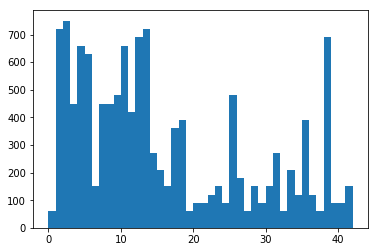

In [6]:
frequencies, classes, *_ = plt.hist(y_test, bins=np.arange(y_test.min(), y_test.max() + 1))
for (freq, cls) in reversed(sorted(zip(frequencies, classes))):
    print("{}: {} ({})".format(
        str(cls).rjust(2, " "), 
        str(int(freq)).rjust(4, " "),
        class_to_description[cls]["SignName"],
    ))

plt.savefig("./artifacts/test_data_distribution.png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation is my starting point.

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

### Pre-process

In [7]:
from sklearn.utils import shuffle

def preprocess(X, y):
    """
    Pipeline for pre-processing images along with their labels
    """
    # Normalizing values to be [-1, 1]
    X_ret = np.subtract(X, 128.) / 128
    
    # Shuffling data
    return X_ret, y

X_train, y_train = preprocess(X_train, y_train)

### Model Architecture

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def Model(x, dropout_rate: "tensor", initial_shape, n_classes=43, mu=0, sigma=0.1):
    # Layer 1: Convolutional.
    in_x, in_y, in_depth = initial_shape
    conv1_W = tf.Variable(tf.truncated_normal(
        shape=(5, 5, in_depth, 10), 
        mean=mu, 
        stddev=sigma,
    ))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1 = tf.nn.conv2d(
        x, 
        conv1_W, 
        strides=[1, 1, 1, 1], 
        padding='VALID'
    ) + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(
        conv1, 
        ksize=[1, 2, 2, 1], 
        strides=[1, 2, 2, 1], 
        padding='VALID',
    )

    # Layer 2: Convolutional.
    conv2_W = tf.Variable(tf.truncated_normal(
        shape=(5, 5, 10, 16), 
        mean=mu, 
        stddev=sigma,
    ))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(
        conv1,
        conv2_W,
        strides=[1, 1, 1, 1], 
        padding='VALID',
    ) + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(
        conv2, 
        ksize=[1, 2, 2, 1], 
        strides=[1, 2, 2, 1], 
        padding='VALID',
    )

    # Flatten.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected.
    fc1_W = tf.Variable(tf.truncated_normal(
        shape=(400, 190), 
        mean=mu, 
        stddev=sigma,
    ))
    fc1_b = tf.Variable(tf.zeros(190))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout_rate)

    # Layer 4: Fully Connected.
    fc2_W = tf.Variable(tf.truncated_normal(
        shape=(190, 90), 
        mean=mu, 
        stddev=sigma,
    ))
    fc2_b = tf.Variable(tf.zeros(90))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout_rate)

    # Layer 5: Fully Connected.
    fc3_W = tf.Variable(tf.truncated_normal(
        shape=(90, n_classes), 
        mean=mu, 
        stddev=sigma,
    ))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


### Train and Validate

In [9]:
rate = 0.001
initial_shape = (32, 32, 3)

x = tf.placeholder(tf.float32, (None, *initial_shape))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
logits = Model(x, keep_prob, initial_shape, n_classes=n_classes)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, kp, batch_size=128):
    """Run inside a session"""
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print("Ready.")

Ready.


In [10]:
EPOCHS = 40
BATCH_SIZE = 512

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid, 1.0, batch_size=BATCH_SIZE)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if (validation_accuracy > .93):
            saver.save(sess, "./models/model.{:.3f}.model".format(validation_accuracy))
            print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.348

EPOCH 2 ...
Validation Accuracy = 0.622

EPOCH 3 ...
Validation Accuracy = 0.749

EPOCH 4 ...
Validation Accuracy = 0.806

EPOCH 5 ...
Validation Accuracy = 0.831

EPOCH 6 ...
Validation Accuracy = 0.849

EPOCH 7 ...
Validation Accuracy = 0.880

EPOCH 8 ...
Validation Accuracy = 0.881

EPOCH 9 ...
Validation Accuracy = 0.896

EPOCH 10 ...
Validation Accuracy = 0.898

EPOCH 11 ...
Validation Accuracy = 0.909

EPOCH 12 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.916

EPOCH 14 ...
Validation Accuracy = 0.926

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 16 ...
Validation Accuracy = 0.929

EPOCH 17 ...
Validation Accuracy = 0.931

Model saved
EPOCH 18 ...
Validation Accuracy = 0.931

Model saved
EPOCH 19 ...
Validation Accuracy = 0.931

Model saved
EPOCH 20 ...
Validation Accuracy = 0.935

Model saved
EPOCH 21 ...
Validation Accuracy = 0.938

Model saved
EPOCH 22 ...
Validation Accuracy = 0.937

Model saved


### Test and Retrieve Accuracies

In [11]:
from matplotlib import image as mpimg

training_accuracy = 0.
validation_accuracy = 0.
test_accuracy = 0.
with tf.Session() as sess:
    saver.restore(sess, "./models/model.0.950.model")  # manually selected

    training_accuracy = evaluate(X_train, y_train, 1.0, batch_size=BATCH_SIZE)
    validation_accuracy = evaluate(X_valid, y_valid, 1.0, batch_size=BATCH_SIZE)
    test_accuracy = evaluate(X_test, y_test, 1.0, batch_size=BATCH_SIZE)
    
    print("Training Data Accuracy: {:.1f}".format(training_accuracy * 100.))
    print("Validation Data Accuracy: {:.1f}".format(validation_accuracy * 100.))
    print("Test Data Accuracy: {:.1f}".format(test_accuracy * 100.))


INFO:tensorflow:Restoring parameters from ./models/model.0.950.model
Training Data Accuracy: 99.7
Validation Data Accuracy: 95.0
Test Data Accuracy: 92.7


---

## Step 3: Test a Model on New Images

New images are from the internet, downloaded from here: http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset (had to manually edit the images to focus on a sign and be 32x32 before feeding into my classifier). The website's full dataset download also includes a csv mapping signs in images to classifications, so I can compare the answers (looks like the same class-to-sign-name mapping is used - talk about consistency).

The file `signnames.csv` is useful here because it contains mappings from the class id to the actual sign name. I built the mapping near the beginning.

In [13]:
from matplotlib import image as mpimg
from glob import glob

image_files = sorted(glob("./sample_images/*"))
images = list(map(mpimg.imread, image_files))

soft = tf.nn.softmax(logits)
top_k = tf.nn.top_k(soft, 5)

top_k_value = None
with tf.Session() as sess:
    saver.restore(sess, "./models/model.0.950.model")  # manually selected
    # `0.941` indicates 94.1% accuracy on the validation set

    top_k_value = sess.run(
        top_k,
        feed_dict={x: images, keep_prob: 1.0}
    )

ranking_assuredness = top_k_value[0]
ranking_indexes = top_k_value[1]

correct = [11, 40, 39, 4, 21]  # obtained from downloaded csv with classifications

def show_image(index):
    plt.imshow(images[index])
    print("Actual: {} ({})".format(correct[index], class_to_description[correct[index]]["SignName"]))
    for (cls, assuredness) in zip(ranking_indexes[index], ranking_assuredness[index]):
        print("{0} (class: {1}) {2:.2f} {3}".format(class_to_description[cls]["SignName"], cls, assuredness, "(correct)" if correct[index] == cls else ""))

INFO:tensorflow:Restoring parameters from ./models/model.0.950.model


Actual: 11 (Right-of-way at the next intersection)
Speed limit (30km/h) (class: 1) 1.00 
Speed limit (20km/h) (class: 0) 0.00 
Speed limit (50km/h) (class: 2) 0.00 
Speed limit (60km/h) (class: 3) 0.00 
Speed limit (70km/h) (class: 4) 0.00 


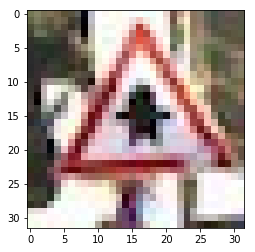

In [14]:
show_image(0)

Actual: 40 (Roundabout mandatory)
Turn left ahead (class: 34) 1.00 
Speed limit (20km/h) (class: 0) 0.00 
Speed limit (30km/h) (class: 1) 0.00 
Speed limit (50km/h) (class: 2) 0.00 
Speed limit (60km/h) (class: 3) 0.00 


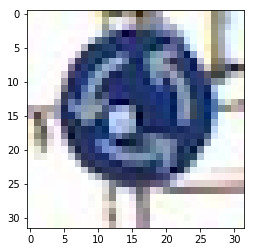

In [15]:
show_image(1)

Actual: 39 (Keep left)
Keep left (class: 39) 1.00 (correct)
Speed limit (20km/h) (class: 0) 0.00 
Speed limit (30km/h) (class: 1) 0.00 
Speed limit (50km/h) (class: 2) 0.00 
Speed limit (60km/h) (class: 3) 0.00 


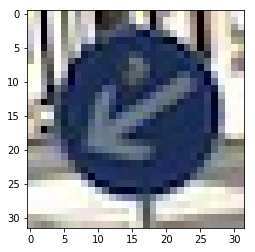

In [16]:
show_image(2)

Actual: 4 (Speed limit (70km/h))
Speed limit (70km/h) (class: 4) 1.00 (correct)
Speed limit (20km/h) (class: 0) 0.00 
Speed limit (30km/h) (class: 1) 0.00 
Speed limit (50km/h) (class: 2) 0.00 
Speed limit (60km/h) (class: 3) 0.00 


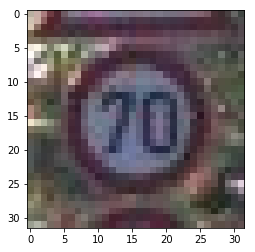

In [17]:
show_image(3)

Actual: 21 (Double curve)
Double curve (class: 21) 1.00 (correct)
Speed limit (20km/h) (class: 0) 0.00 
Speed limit (30km/h) (class: 1) 0.00 
Speed limit (50km/h) (class: 2) 0.00 
Speed limit (60km/h) (class: 3) 0.00 


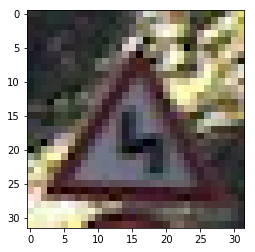

In [18]:
show_image(4)

In [19]:
# Accuracy on 5 images:
picks = list(map(lambda r: r[0], ranking_indexes))
matches = list(map(lambda m: m[0] == m[1], zip(picks, correct)))
print(len(list(filter(lambda x: x, matches))) / float(len(matches)))

0.6
